In [1]:
#pythonによるAI・機械学習・深層学習アプリの作り方　という本で学習した物になります

in_file = "東京の気象データ.csv"
out_file = "kion10y.csv"

#CSVファイルを一行ずつ読み込み
with open(in_file,"rt",encoding = "Shift_JIS")as fr:
    lines = fr.readlines()

#ヘッダーをそぎ落して、新たなヘッダーをつける
lines = ["年,月,日,気温,品質,均質\n"]+lines[5:]
lines = map(lambda v: v.replace('/',','),lines)
result = "".join(lines).strip()
print(result)

#結果をファイルへ出力
with open(out_file,"wt",encoding="utf-8") as fw:
    fw.write(result)
    print("saved.")

年,月,日,気温,品質,均質
2006,1,1,3.6,8,1
2006,1,2,4.0,8,1
2006,1,3,3.7,8,1
2006,1,4,4.0,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4.0,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9.0,8,1
2006,1,17,8.0,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4.0,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6.0,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6.0,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6.0,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2.0,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7.0,8,1
2006,2,18,4.4,8,1
2006,2,19,7.0,8,1
2006,2,20,6.4,8,1
2006,2,21,8.0,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,2

In [2]:
import pandas as pd

#pandas でCSVを読み込む
df = pd.read_csv("kion10y.csv",encoding = "utf-8")

#日付ごとに気温をリストにまとめる
md = {}
#iterrowsにするとpandas(DataFrame型のデータ)で1行づつ処理できる
for i,row in df.iterrows():
    m,d,v = (int(row['月']),int(row['日']),float(row['気温']))
    key = str(m) + "/" +str(d)
    if not (key in md):md[key] = []
    md[key] += [v]
#print(md)
#日付ごとに平均を求める
avs = {}

for key in md:
    v = avs[key] = sum(md[key])/len(md[key])
    print("{0}:{1}".format(key,v))

1/1:6.0
1/2:6.545454545454546
1/3:6.145454545454546
1/4:6.1
1/5:6.4818181818181815
1/6:6.663636363636363
1/7:6.290909090909091
1/8:6.718181818181818
1/9:6.6000000000000005
1/10:6.0636363636363635
1/11:5.972727272727272
1/12:5.045454545454546
1/13:5.427272727272728
1/14:5.090909090909092
1/15:5.4363636363636365
1/16:5.654545454545454
1/17:5.627272727272726
1/18:5.045454545454546
1/19:6.0636363636363635
1/20:5.6909090909090905
1/21:5.6
1/22:5.5636363636363635
1/23:5.890909090909091
1/24:5.4818181818181815
1/25:6.0
1/26:6.027272727272727
1/27:6.363636363636363
1/28:6.5
1/29:6.281818181818181
1/30:6.763636363636365
1/31:6.754545454545453
2/1:6.309090909090909
2/2:6.663636363636363
2/3:6.363636363636363
2/4:5.800000000000001
2/5:5.790909090909091
2/6:5.318181818181818
2/7:6.1909090909090905
2/8:5.645454545454545
2/9:5.754545454545455
2/10:6.627272727272726
2/11:5.618181818181818
2/12:5.690909090909091
2/13:6.618181818181818
2/14:8.081818181818184
2/15:7.590909090909091
2/16:6.18181818181818

In [7]:
avs["11/1"]

16.536363636363635

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


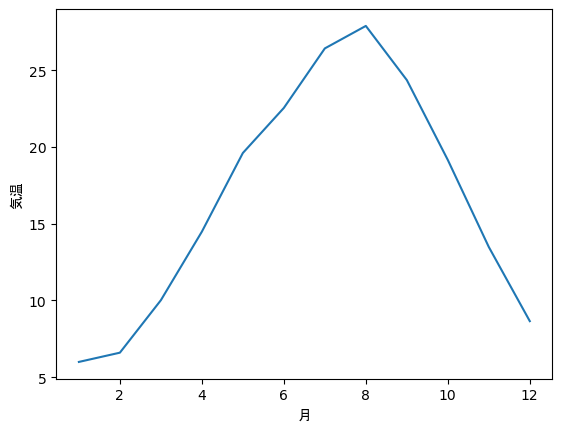

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv ("kion10y.csv",encoding = "utf-8")

#月ごとに平均を求める
g = df.groupby(["月"])["気温"]
gg = g.sum()/g.count()

#結果を出力
print(gg)
gg.plot()
plt.xlabel("月",fontname = "MS Gothic")
plt.ylabel("気温",fontname = "MS Gothic")
plt.show()



年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


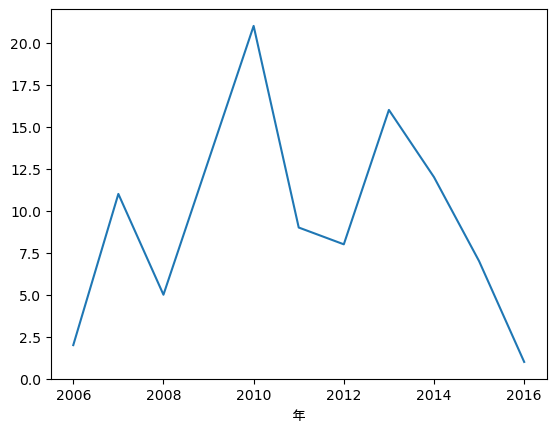

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

#ファイルを読む
df = pd.read_csv("kion10y.csv",encoding = "utf-8")
#気温が30度越えのデータを調べる
atui_bool = (df["気温"]>30)
#データを抜き出す
atui = df[atui_bool]
#print(atui)
#年ごとにカウント
cnt = atui.groupby(["年"])["年"].count()
#出力

print(cnt)
cnt.plot()
plt.xlabel("年",fontname = "MS Gothic")
plt.savefig("tenki-over30.png")
plt.show()


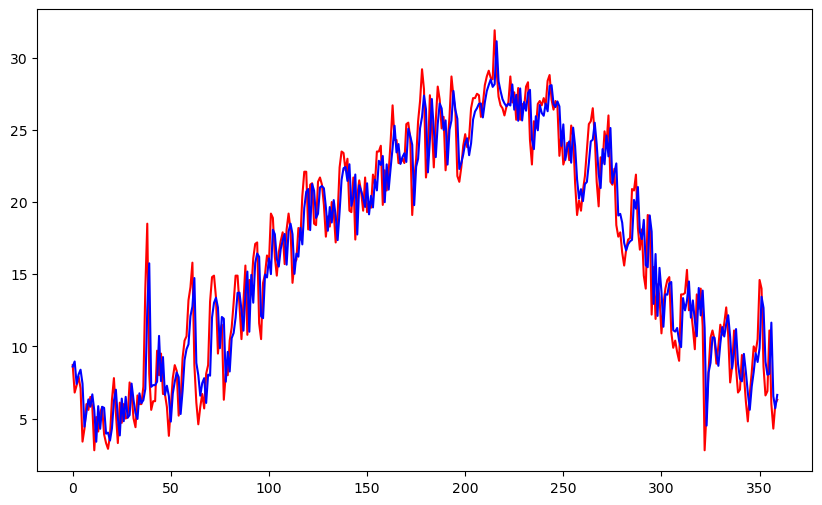

In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#気温データ10年分の読み込み
df = pd.read_csv("kion10y.csv",encoding = "utf-8")

#print(df)

#データを学習用とテスト用に分割する
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

#過去6日分を学習するデータを作成
def make_data(data):
    x = []#学習データ
    y = []#結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i<interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return(x,y)

train_x,train_y = make_data(df[train_year])
test_x,test_y = make_data(df[test_year])

#直線回帰分析を行う
lr = LinearRegression()# normalize = True を入れてたけどあると動かない　仕様変更？
lr.fit(train_x,train_y)#学習
pre_y = lr.predict(test_x)#予測

#結果を図にプロット
plt.figure(figsize=(10,6),dpi=100)
plt.plot(test_y,c = 'r')
plt.plot(pre_y,c = 'b')
#plt.savefig('tenki-kion-lr.png')
plt.show()

In [9]:
diff_y = abs(pre_y - test_y)
print("平均 = ",sum(diff_y)/len(diff_y))
print("最大 = ",max(diff_y))

平均 =  1.6640684971954256
最大 =  8.471949619908472
